In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 


/kaggle/input/nfl-big-data-bowl-2025/players.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2025/games.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2025/player_play.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2025/plays.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv


In [23]:
!pip install dirty_cat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 3.6 MB/s eta 0:00:00


In [3]:
games = pd.read_csv('../input/nfl-big-data-bowl-2025/games.csv')
plays = pd.read_csv('../input/nfl-big-data-bowl-2025/plays.csv')
players = pd.read_csv('../input/nfl-big-data-bowl-2025/players.csv')
players_play = pd.read_csv('../input/nfl-big-data-bowl-2025/player_play.csv')
players_play.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
0,2022090800,56,35472,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2022090800,56,42392,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2022090800,56,42489,BUF,0,0,0,0,0,1,...,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022090800,56,44875,BUF,0,0,0,0,0,0,...,NaN,NaN,43335.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2022090800,56,44985,BUF,0,0,0,0,0,0,...,1.0,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sns.histplot(players['weight'])

In [16]:
p_g = pd.merge(plays, games, on='gameId', how='inner') 
p_p = pd.merge(players, players_play, on='nflId', how='inner')

In [17]:
null_percentage = p_g.isnull().sum() / len(df) * 100
columns_less_than_10_percent_null = null_percentage[null_percentage < 10].index
pg_f = df.filter(columns_less_than_10_percent_null, axis=1)
pg_f.dropna()
print(pg_f.columns)

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'prePenaltyYardsGained', 'yardsGained',
       'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded',
       'expectedPointsAdded', 'isDropback', 'pff_runConceptPrimary',
       'pff_runConceptSecondary', 'pff_runPassOption', 'pff_passCoverage',
       'pff_

In [9]:
new_df = df.filter(columns_less_than_10_percent_null, axis=1)
new_df.dropna()
print(new_df.columns)

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'playAction', 'qbKneel', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runPassOption', 'pff_passCoverage', 'pff_manZone', 'season',
       'week', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr',
       'visitorTeamAbbr', 'homeFinalScore', 'visitorFinalScore', 'nflId',
       'teamAbbr', 'hadRushAttempt', 'rushingYards', 'hadDropback',
       'passingYards', 'sackYardsAsOffense', 'hadPassReception',
       'receivingYards', 'wasTarget

In [24]:
import warnings

import plotly.express as px
from dirty_cat import SuperVectorizer
from dirty_cat.datasets import fetch_employee_salaries
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

In [25]:
y = pg_f['pff_runPassOption']
X = pg_f.filter(['quarter', 'down', 'yardsToGo','yardlineNumber','offenseFormation', 'receiverAlignment','pff_passCoverage','pff_manZone'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)
def pipeline_model(encoder, X_train, y_train, X_test, y_test):
    ## Pipeline Model
    pipeline = make_pipeline(encoder, RandomForestRegressor())

    ## Fit and evaluate model
    pipeline.fit(X_train, y_train)
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    print(f"Train score: {train_score:.3f}, Test score: {test_score:.3f}")

    # Check the features
    features = pipeline[0].get_feature_names_out()
    print(f"Num cols after encoding: {len(features)}")
    print(f"Encoded columns: ...{features[-5:]}")

    # Plot Feature Importance
    plot_feature_importance(pipeline, features)
    return pipeline, features

# Dirty Cat SuperVectorizer - 🧵 Simple!
super_encoder = SuperVectorizer()

# Create and fit the pipeline model
pipeline, features = pipeline_model(super_encoder, X_train, y_train, X_test, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:67: FutureWarning: Class SuperVectorizer is deprecated; use TableVectorizer instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.10/site-packages/dirty_cat/_table_vectorizer.py:481: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(value=np.nan, inplace=True)
/opt/conda/lib/python3.10/site-packages/dirty_cat/_table_vectorizer.py:518: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained

Train score: 0.775, Test score: 0.770
Num cols after encoding: 47
Encoded columns: ...['pff_manZone_nan', 'quarter', 'down', 'yardsToGo', 'yardlineNumber']


NameError: name 'plot_feature_importance' is not defined

In [15]:
print(new_df['offenseFormation'].nunique())

7


In [ ]:
sns.histplot(players['height'])

In [ ]:
sns.histplot(plays['timeToThrow'])

In [ ]:
sns.kdeplot(data=plays, x='timeToThrow', hue='quarter', shade=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='receiverAlignment', ylabel='Count'>

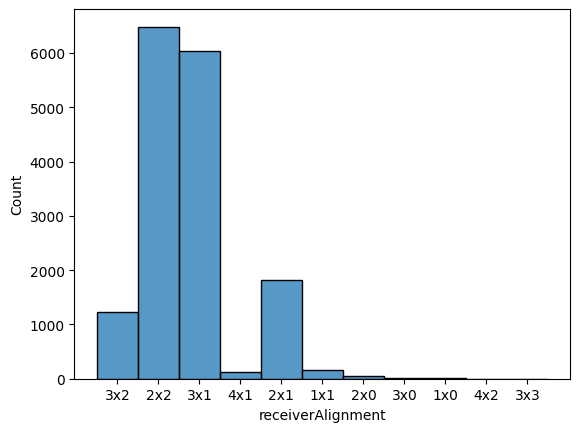

In [3]:
sns.histplot(plays['receiverAlignment'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='collegeName', ylabel='Count'>

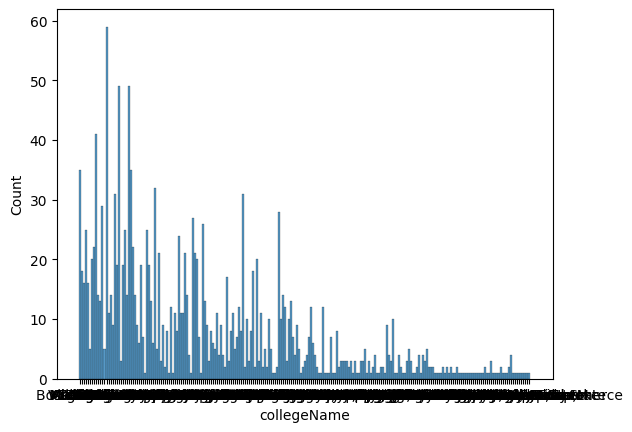

In [4]:
sns.histplot(players['collegeName'])

In [ ]:
sns.kdeplot(data=plays, x='timeToThrow', hue='passLocationType', shade=True)

In [ ]:
sns.histplot(plays['offenseFormation'])

In [ ]:
sns.histplot(plays['passLocationType'])

In [ ]:
sns.histplot(plays['timeInTackleBox'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='passResult', ylabel='Count'>

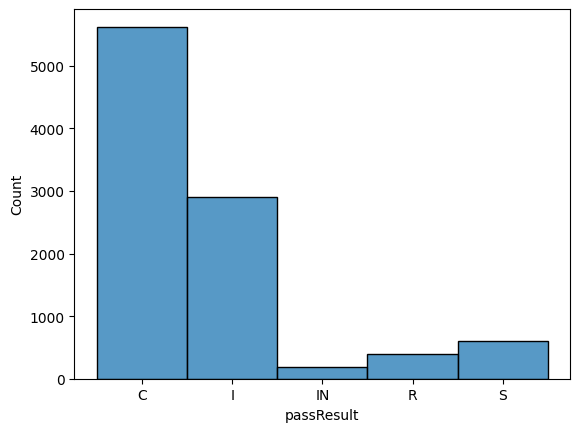

In [4]:
sns.histplot(plays['passResult'])

In [ ]:
y = plays.yardsGained
plays_dropped = plays.dropna(axis=0)
p_res_features = ['yardsToGo','targetX','targetY','dropbackDistance','timeToThrow','timeInTackleBox','timeToSack']
X = plays_dropped[p_res_features]
X.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
y = plays.yardsGained
X = plays.drop(['yardsGained'], axis = 1)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()] 
X_train_full.drop(cols_with_missing, axis=1, inplace=True)
X_valid_full.drop(cols_with_missing, axis=1, inplace=True)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 1000 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train.head()

In [ ]:
print(cols_with_missing)

In [ ]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

In [ ]:
plays['pff_passCoverage'].head()

In [ ]:
sns.histplot(plays['passLength'])

In [ ]:
sns.histplot(plays['dropbackType'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='dropbackDistance', ylabel='Count'>

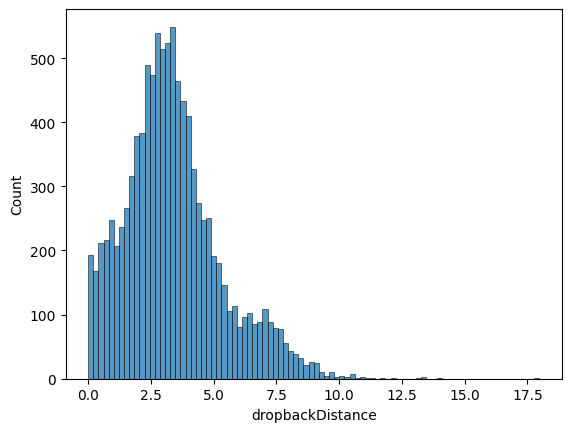

In [3]:
sns.histplot(plays['dropbackDistance'])

In [ ]:
sns.kdeplot(data=plays, x='passLength', hue='offenseFormation', shade=True)